# Methodology 3 (Transfer learning)

In [1]:
import os  
main_directory = os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Datapreprocessing import DataCleaning, DataTransformation, Data_split
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Datavisualization import Visualization, InferencePlots, plot_scatter_with_categories, plot_scatter_with_categories_and_std, plot_heatmap_mae, plot_heatmap_count
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Train_Predict_Plot import ML_Models_Train, ML_Models_Train_transferlearning

Failed to import duecredit due to No module named 'duecredit'


Steel

In [3]:
data_nims_dabef_steel = pd.read_excel(r"data\05_Final Data\NIMS_RB_DaBef Data Steel.xlsx")
data_jsms_steel = pd.read_excel(r"data\05_Final Data\JSMS Data Steel.xlsx")

columns = ['CodeSeries', 'Material', 'Rm', 'Kt', 'G0', 'R_ratio', 'L_Type', 'Stress_Type', 'Control', 'FT_Env_T', 'FT_Env_M', 's_d', 'SD_FKM_local', 'SD_FKM_nominal']   

data_nims_dabef_steel = data_nims_dabef_steel[columns]
data_jsms_steel = data_jsms_steel[columns]

data_steel = pd.concat((data_nims_dabef_steel, data_jsms_steel), axis=0, ignore_index=True)

In [4]:

##################################################################################################################################################################################################

# Define features and labels
mech_prop_fea = ['Rm'] 
comp_design_fea = ['Kt', 'R_ratio', 'L_Type'] 
columns_features =  comp_design_fea + mech_prop_fea 
column_target = ['s_d']

# List of columns where missing instance entire row will be removed
columns_remove_missingvalues = mech_prop_fea + comp_design_fea + column_target 

# Dictnory specifying column names t be filtered and data to be kept in respective column
columns_filter = {'FT_Env_T': ['RT'], 'FT_Env_M': ['air'], 'Stress_Type': ['CONSTANT STRESS RATIO'], 'Control':['load','Force','Stress'], 'L_Type':['Bending','Torsion','Tension-compression']}  

# Condition to exclude data points where runouts are absent. Set True for model prediction of 's_d' and 'n_e', set False for 'k' and 'one_t_s' predictions 
exclude_norunnouts = True
feature_name = 's_d'

# Outlier handling method
condition_outlierdetection = True
columns_outlier = column_target 
detection_method_factor = {'method' : 'iqr', 'factor' : 1.5}                      # 'zscore' or 'iqr'
handling_method = 'remove'                                                        # 'remove' or 'cap'

##################################################################################################################################################################################################

# List of columsns for imputing number, string, mean, median or custom functions at missing values.
columns_impute = {}                                                                                                               

# List of categorical columns for data encoding either with ordinalencoder or onehot encoder 
columns_categorical_dataencoding = ['L_Type']  
dataencoding_method = 'ordinalencoder'                                                                                                                              

# Select columns to rescale for training
con_scale = True
scale_method = "standardization"                                               # normalization/ standardization

##################################################################################################################################################################################################

columns_visualization = column_target 
columns_pairplots =  {'Mechanical properties' : ['Rm', 'Kt', 's_d']}
columns_contourplots = {'Mechanical properties' : ['Rm', 's_d']}

##################################################################################################################################################################################################

# Data split into train, validation and test data.
train_splitsize = 0.7
test_splitsize = 0.5
batch_size = 29
datasplit_seed = 28
custom_datasplit = False
method = {'Kfold': 5}                                # Keys: Quartile/ Categorical/ Kfold/ Custom-Kfold

##################################################################################################################################################################################################

model_seed = 42

##################################################################################################################################################################################################


In [6]:
pipeline = Pipeline([
    ('DataCleaning',DataCleaning(columns_remove_missingvalues, columns_filter, exclude_norunnouts, feature_name, condition_outlierdetection, columns_outlier, detection_method_factor, handling_method)),
    ('DataTransformation',DataTransformation(columns_features, column_target, columns_impute, columns_categorical_dataencoding, dataencoding_method, con_scale, scale_method)),
    ('Visualization', Visualization(columns_visualization, columns_pairplots, metal_name="Steel")),
    ('Data_split', Data_split(columns_features, column_target, train_splitsize, test_splitsize, datasplit_seed, batch_size, custom_datasplit, method, columns_pairplots, columns_contourplots)),
    ('Model training', ML_Models_Train(method, 'S_d (MPa)', custom_datasplit, model_seed, con_hypopt=False, con_deter_models=True, con_prob_models=True, con_descale=True))  
])

Data cleaning step completed
Data transformation step completed


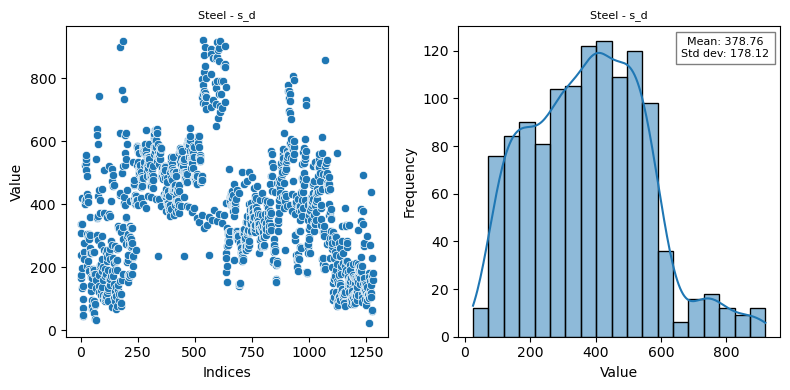

Data visualisation step completed
Train data: 863
Val data: 185
Test data: 186


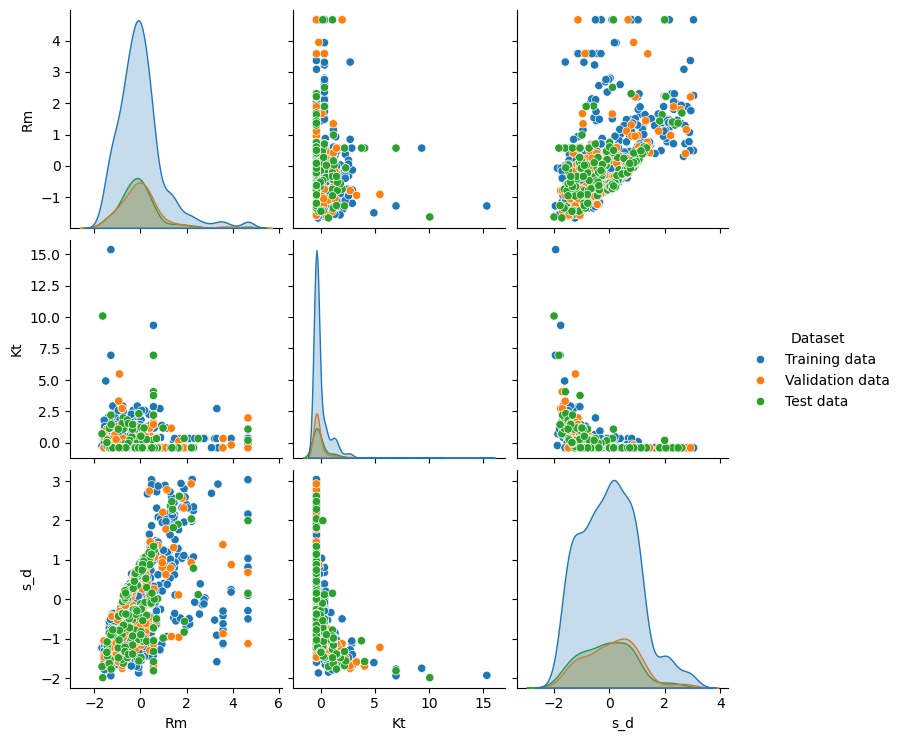

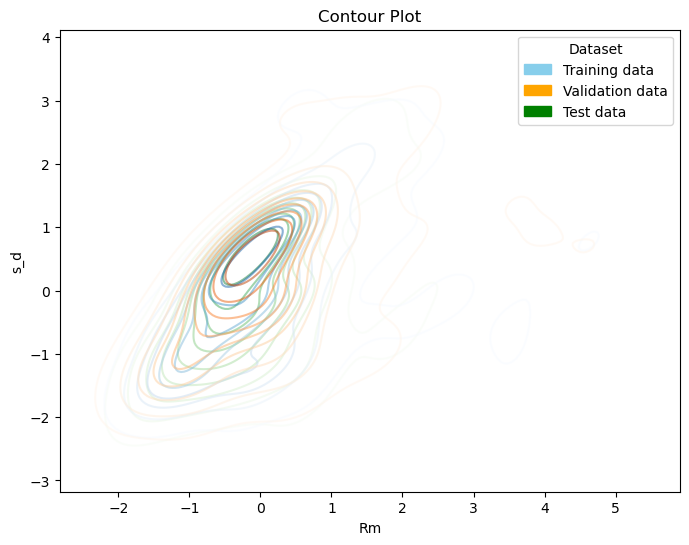

Data split step completed
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed


c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepensemble network 7/10...
Training Deepensemble network 8/10...
Training Deepensemble network 9/10...
Training Deepensemble network 10/10...
Training of all ensemble networks completed.
Descaled error
Mean absolute error: {'LR': 75.91118, 'RF': 28.961416292171197, 'SVR': 31.244591181002605, 'KNN': 34.470776, 'NN': 35.58657}
Mean squared error: {'LR': 10876.0625, 'RF': 2214.9957722666954, 'SVR': 2842.435669380283, 'KNN': 3035.0872, 'NN': 3162.3037}


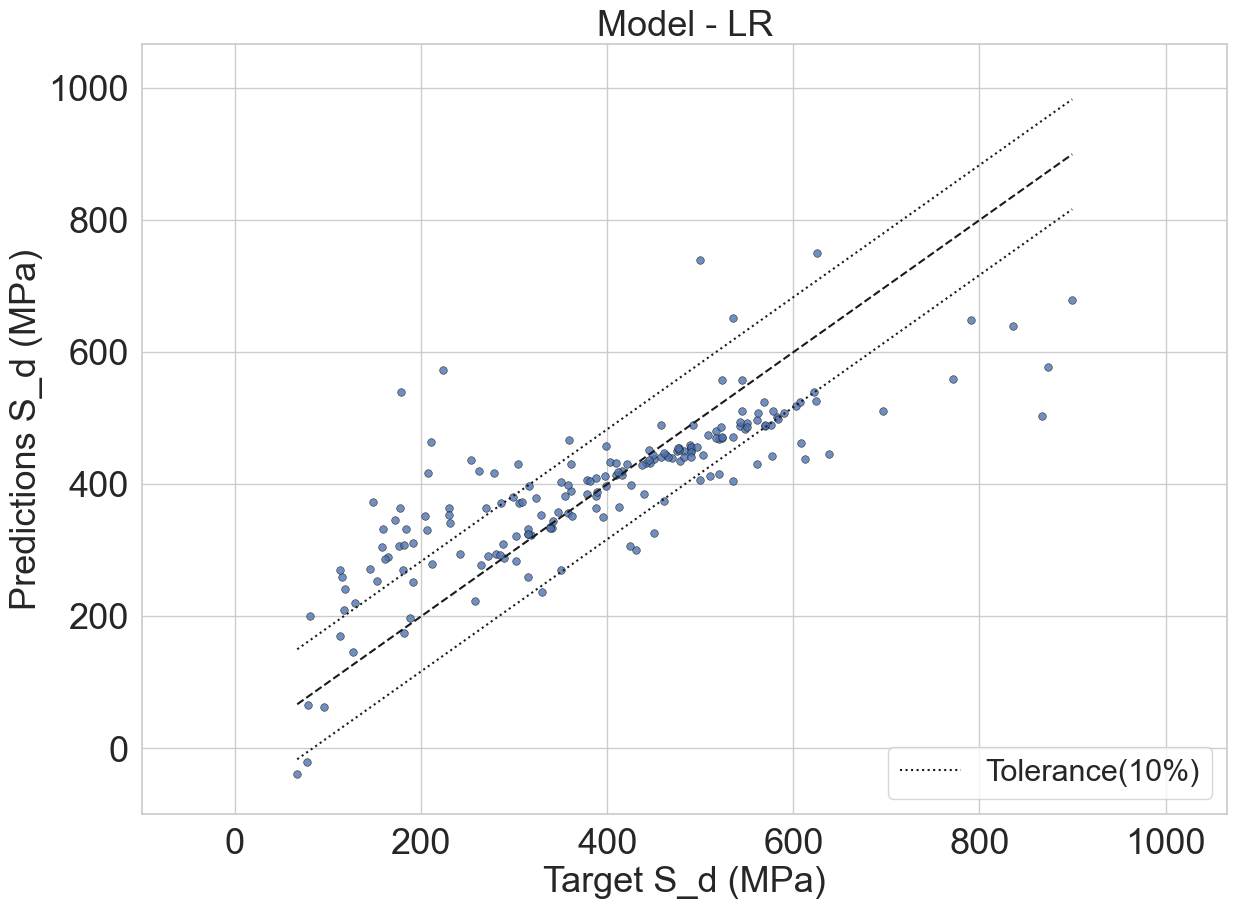

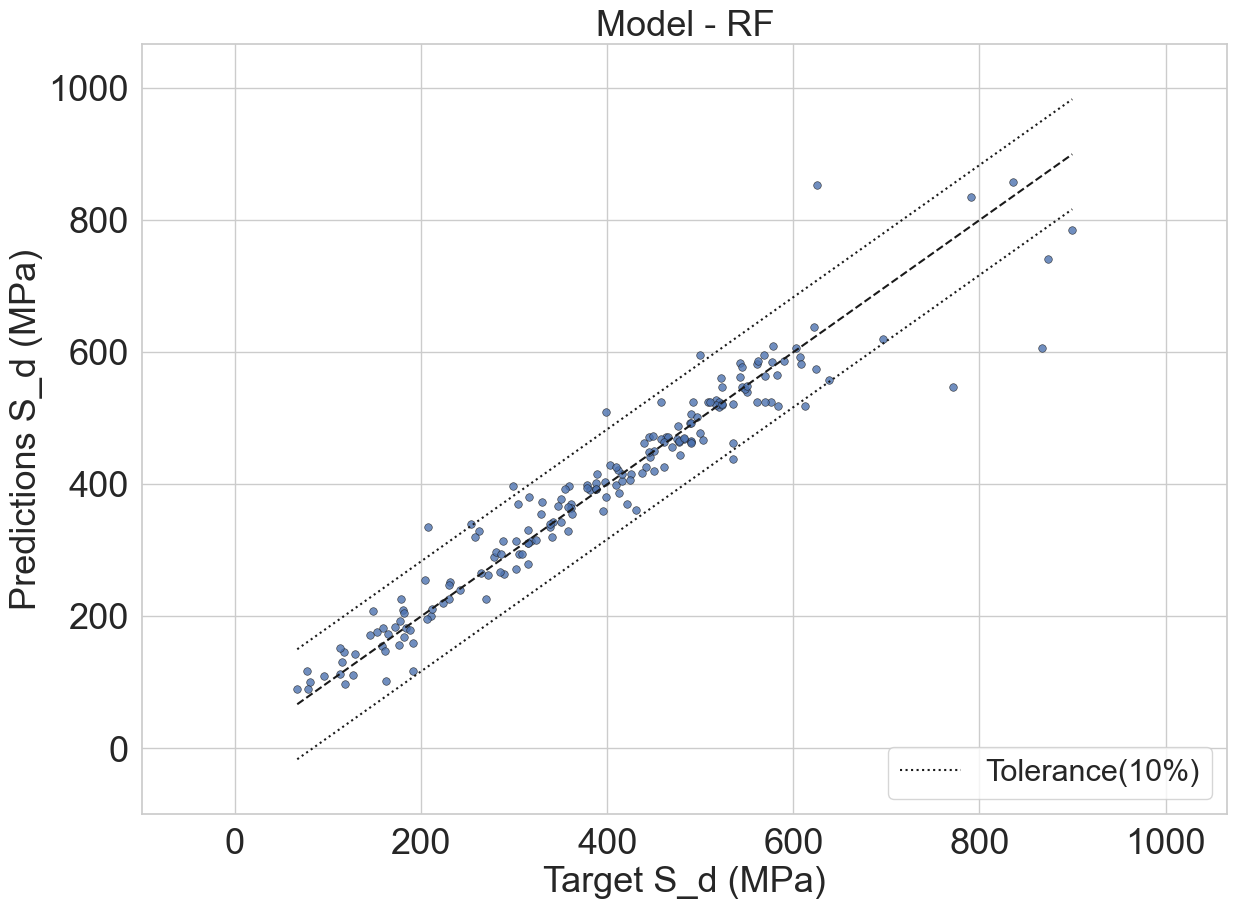

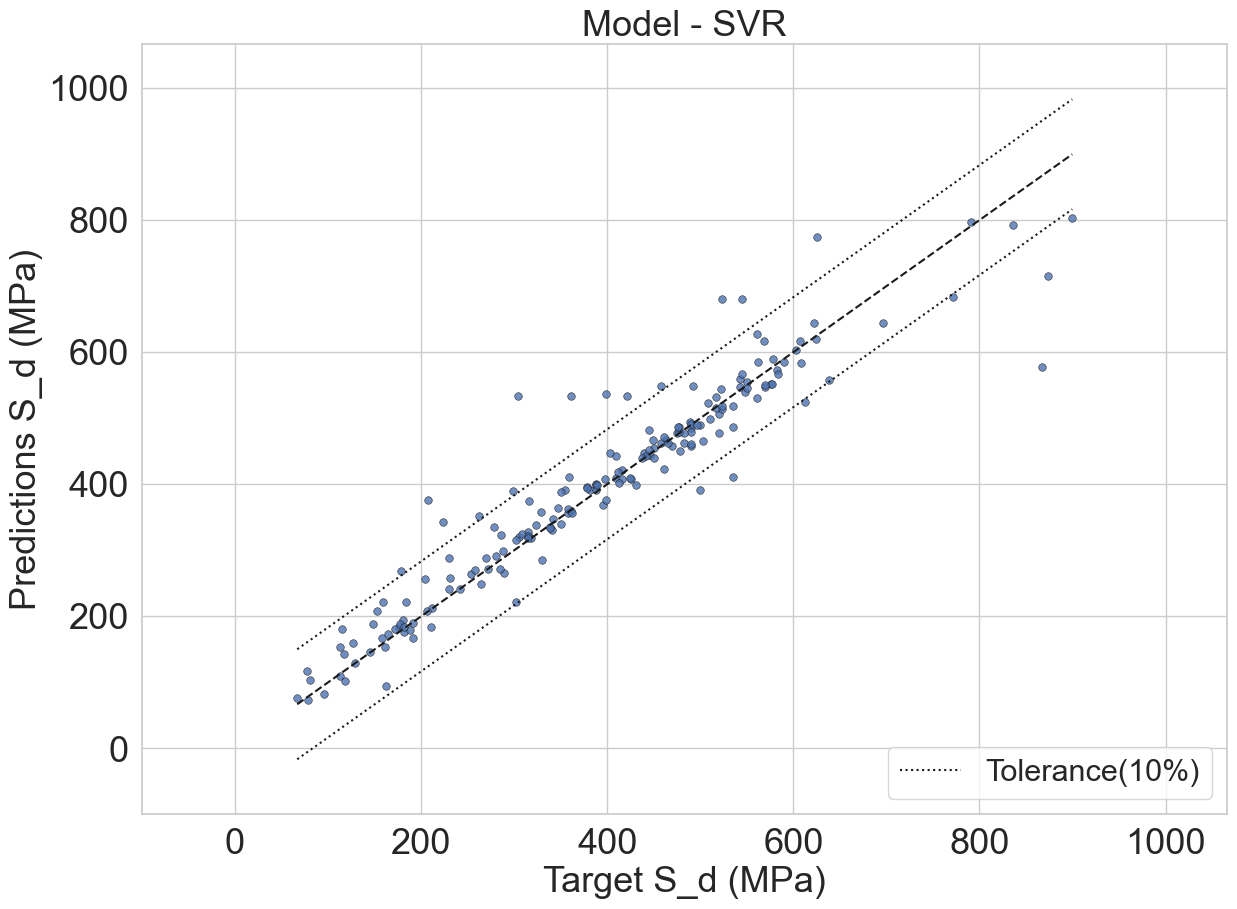

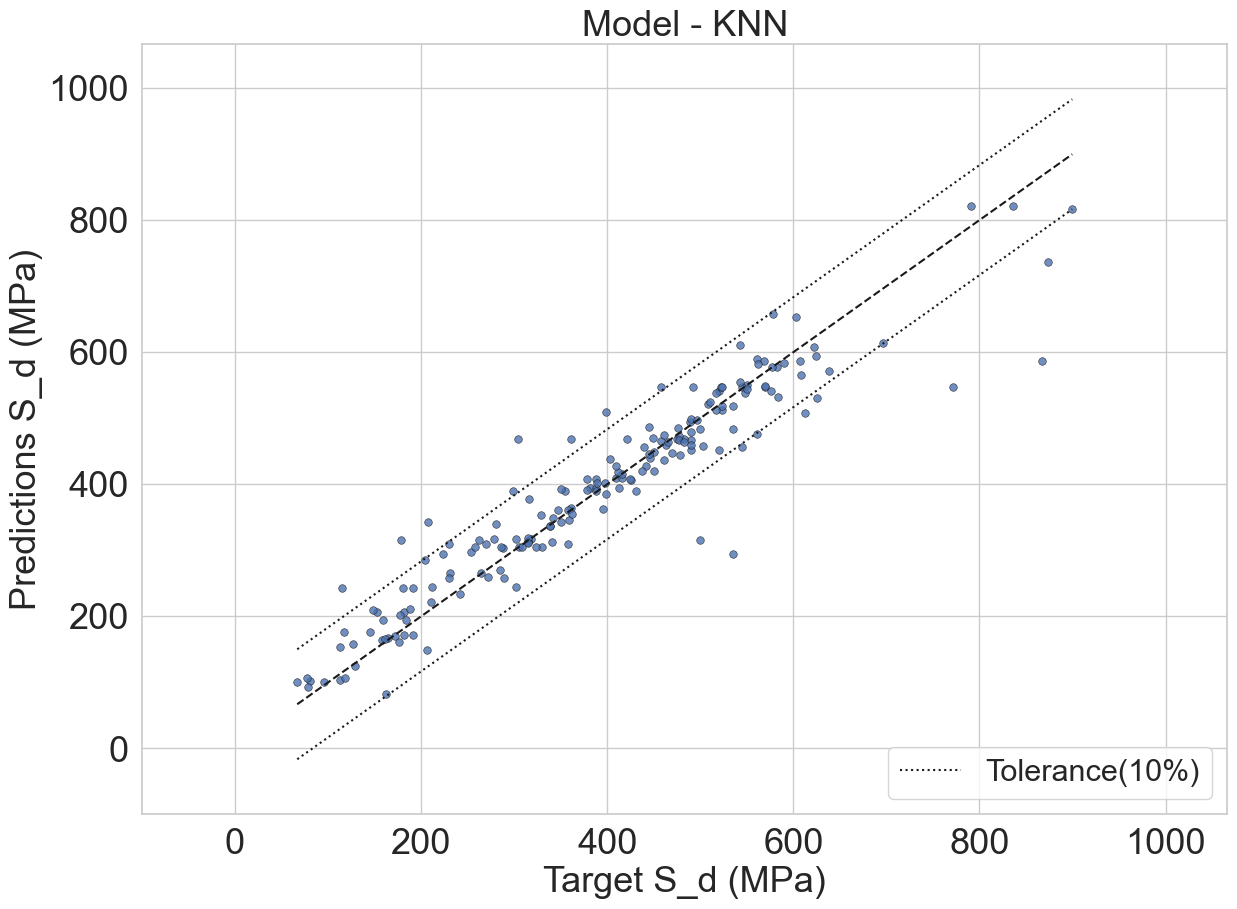

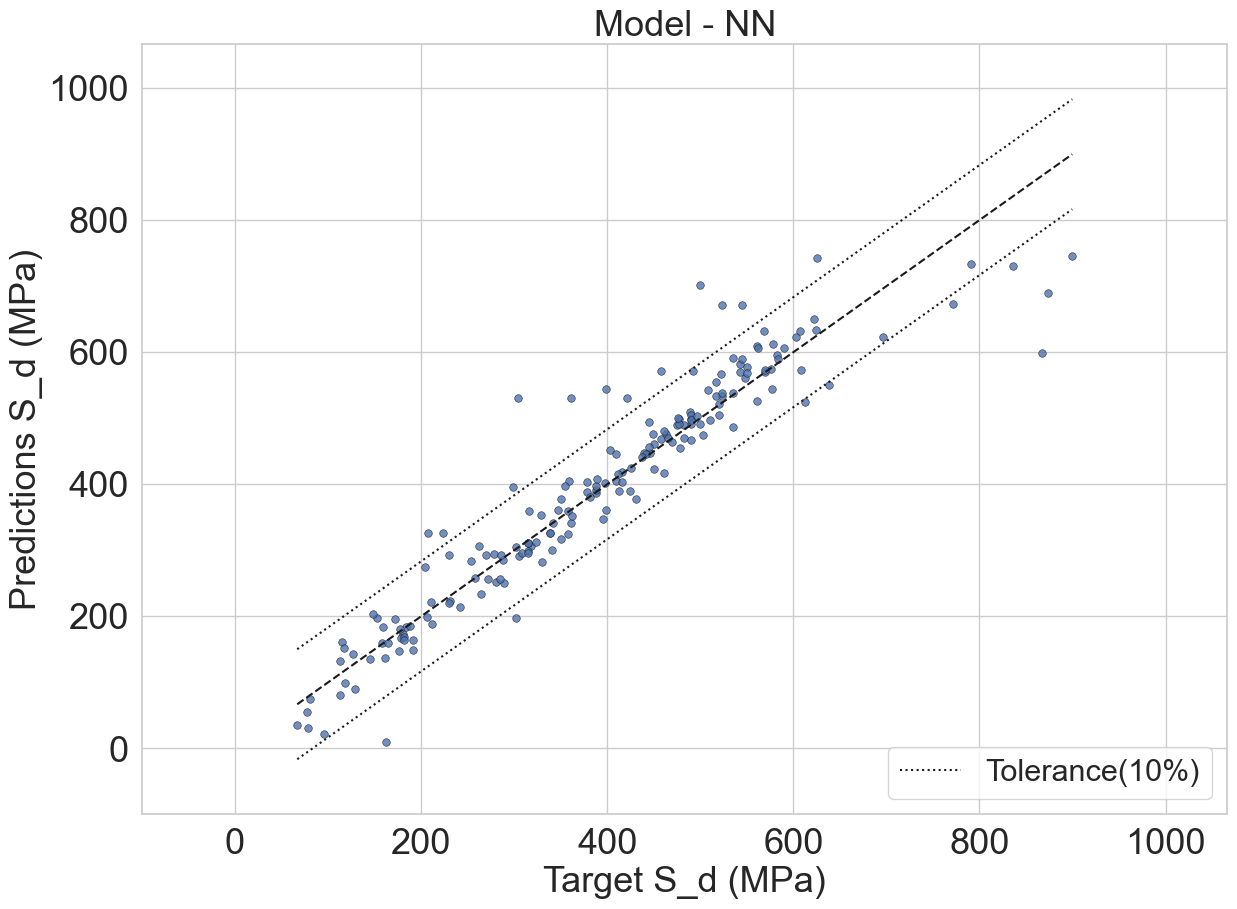

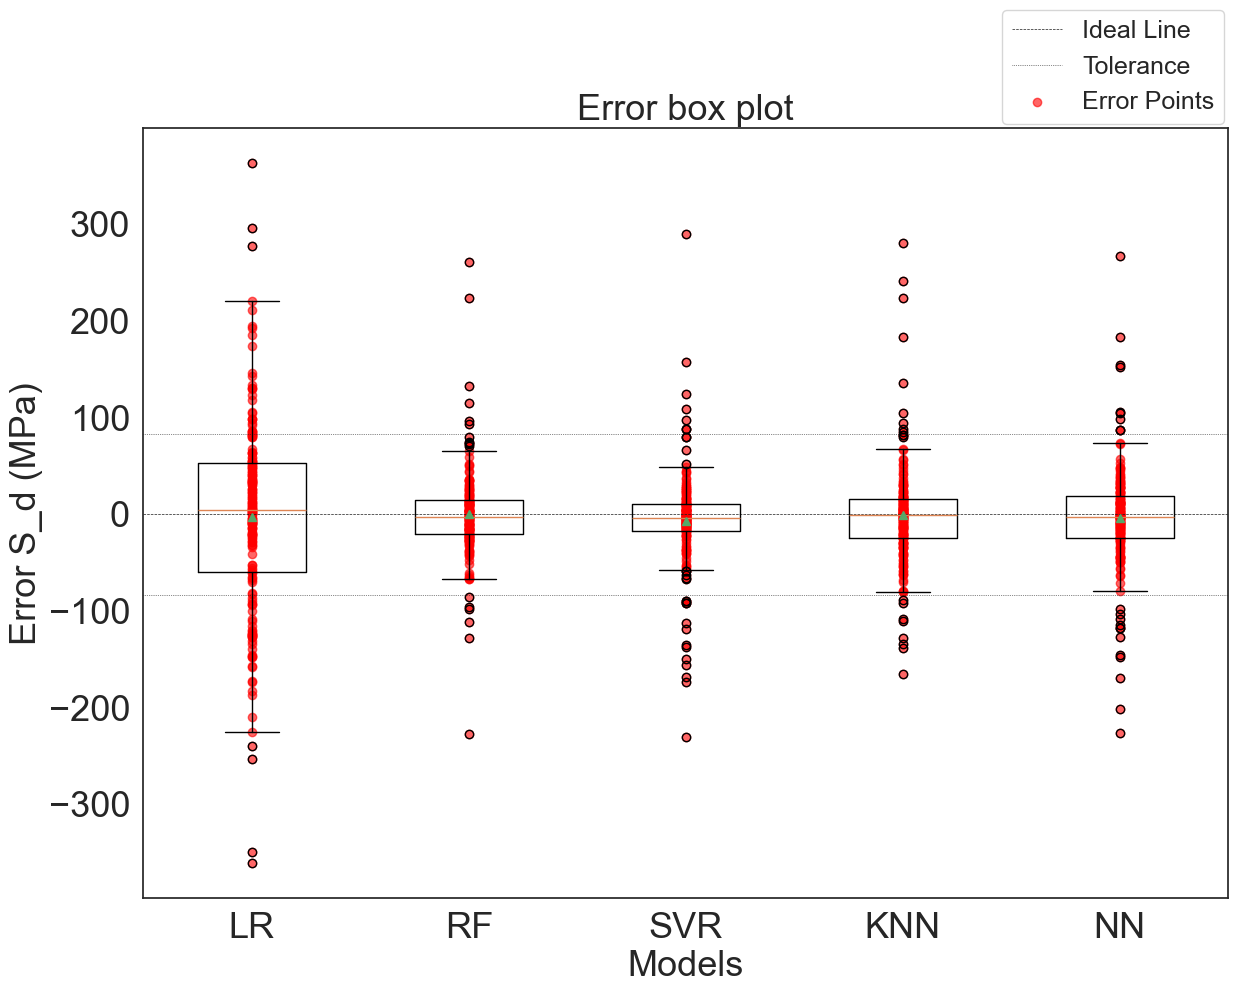

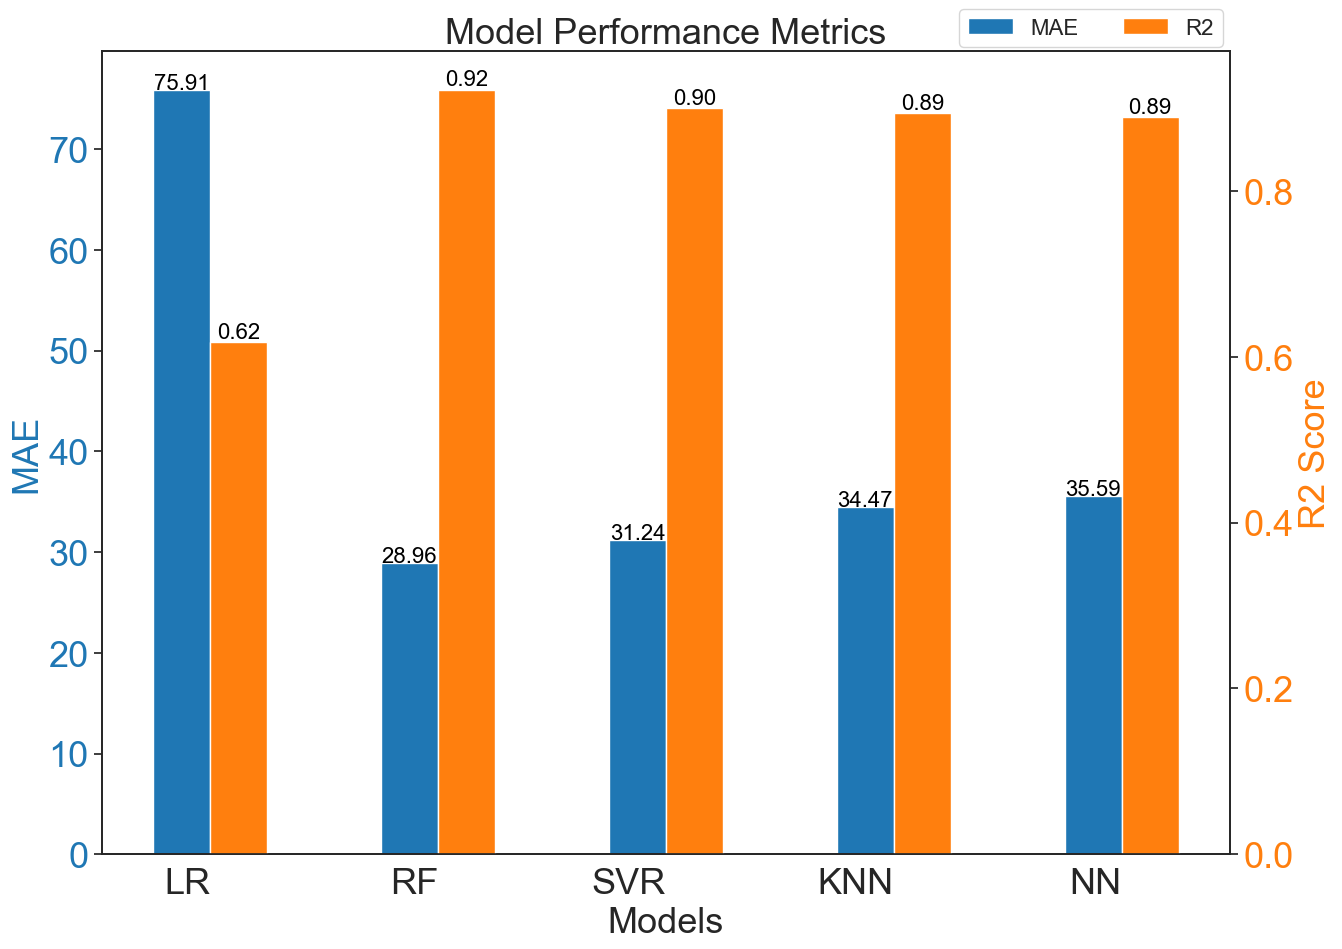

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 63.30066194461277, 'RFCI': 29.151770955295483, 'PNN': 34.502686, 'DeepEnsemble': 34.71505615695088}
NLL: {'GPR': 6.960064416449906, 'RFCI': 6.8855043897040105, 'PNN': 4.127882656847302, 'DeepEnsemble': 4.2358126031588315}
Mean Std: {'GPR': 73.18264280070322, 'RFCI': 15.33393760684402, 'PNN': 47.97321017798538, 'DeepEnsemble': 54.99677976769438}


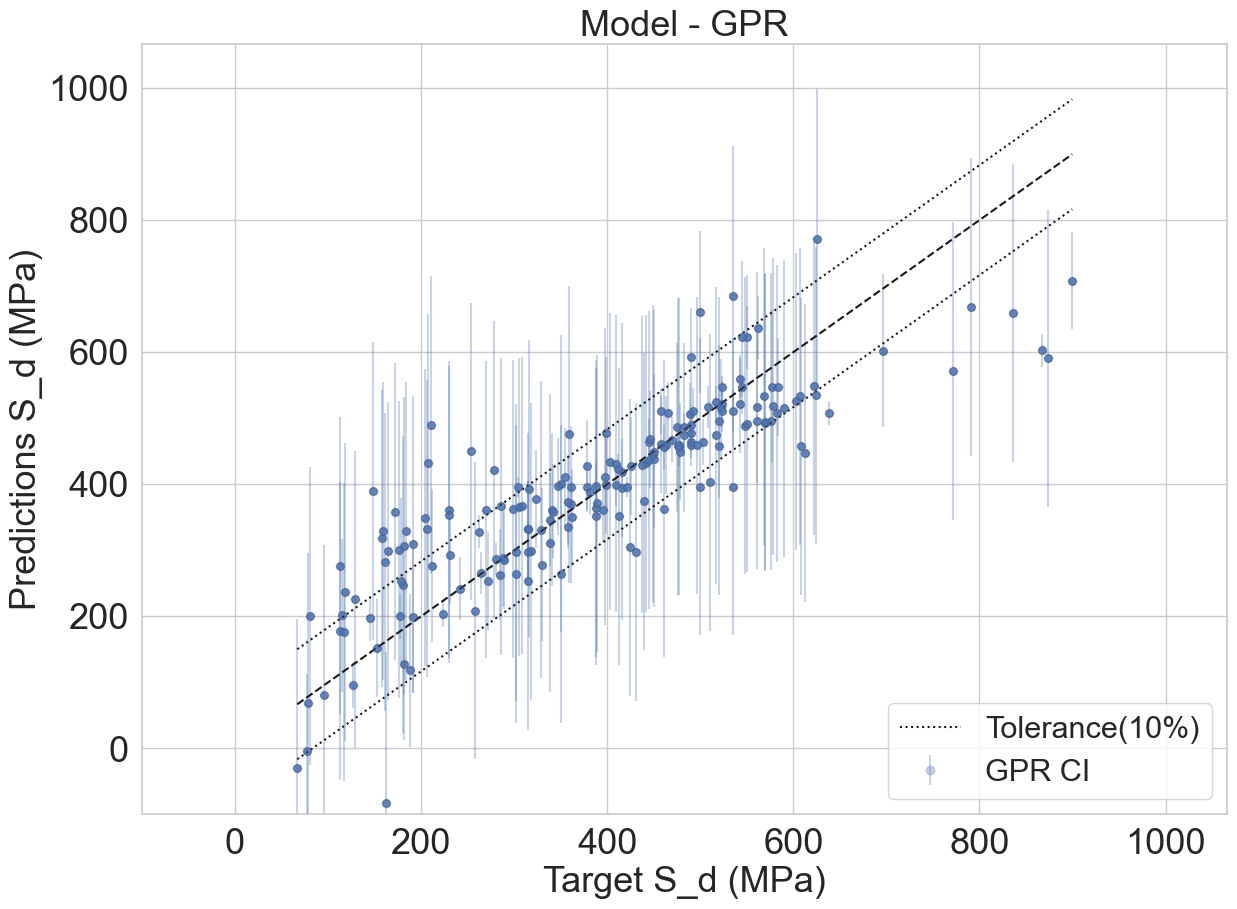

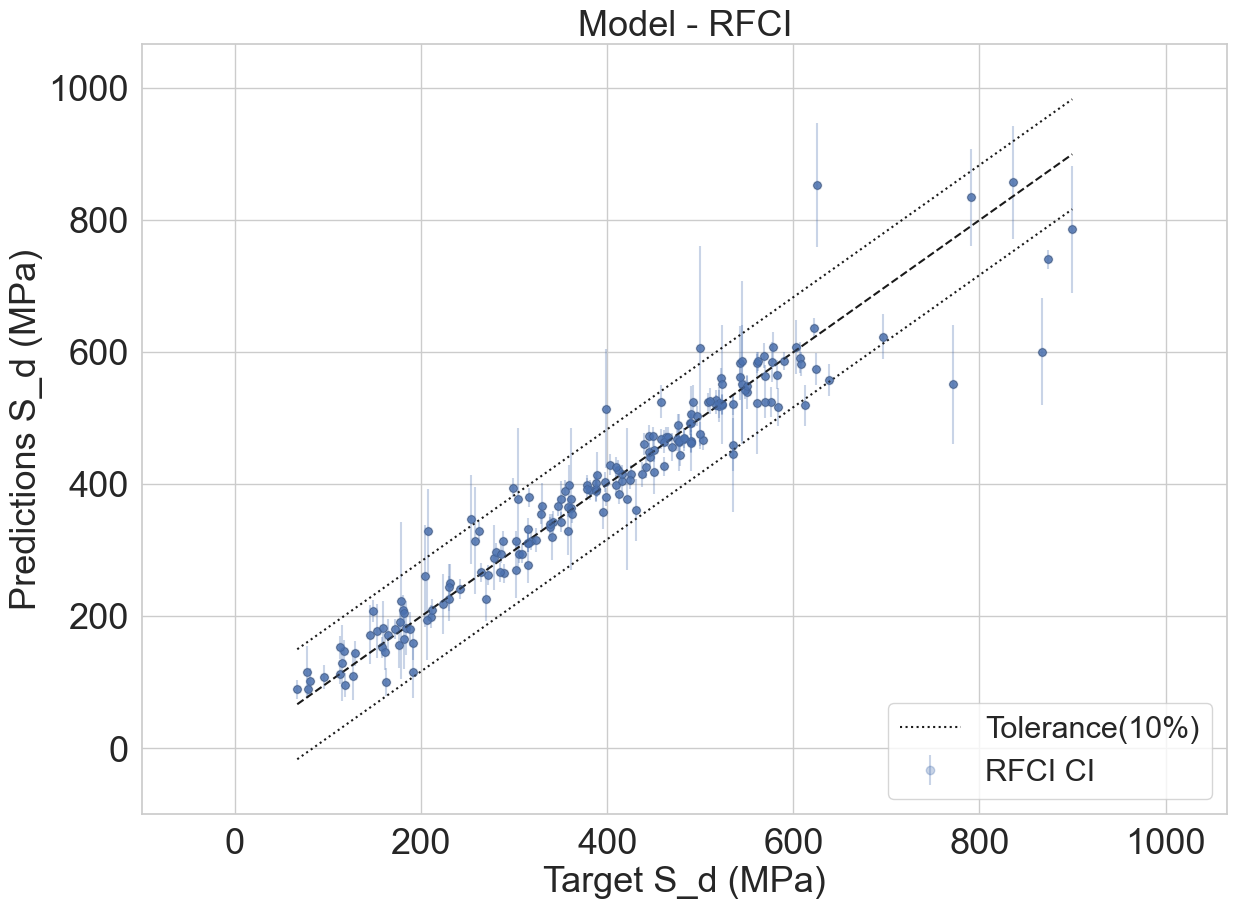

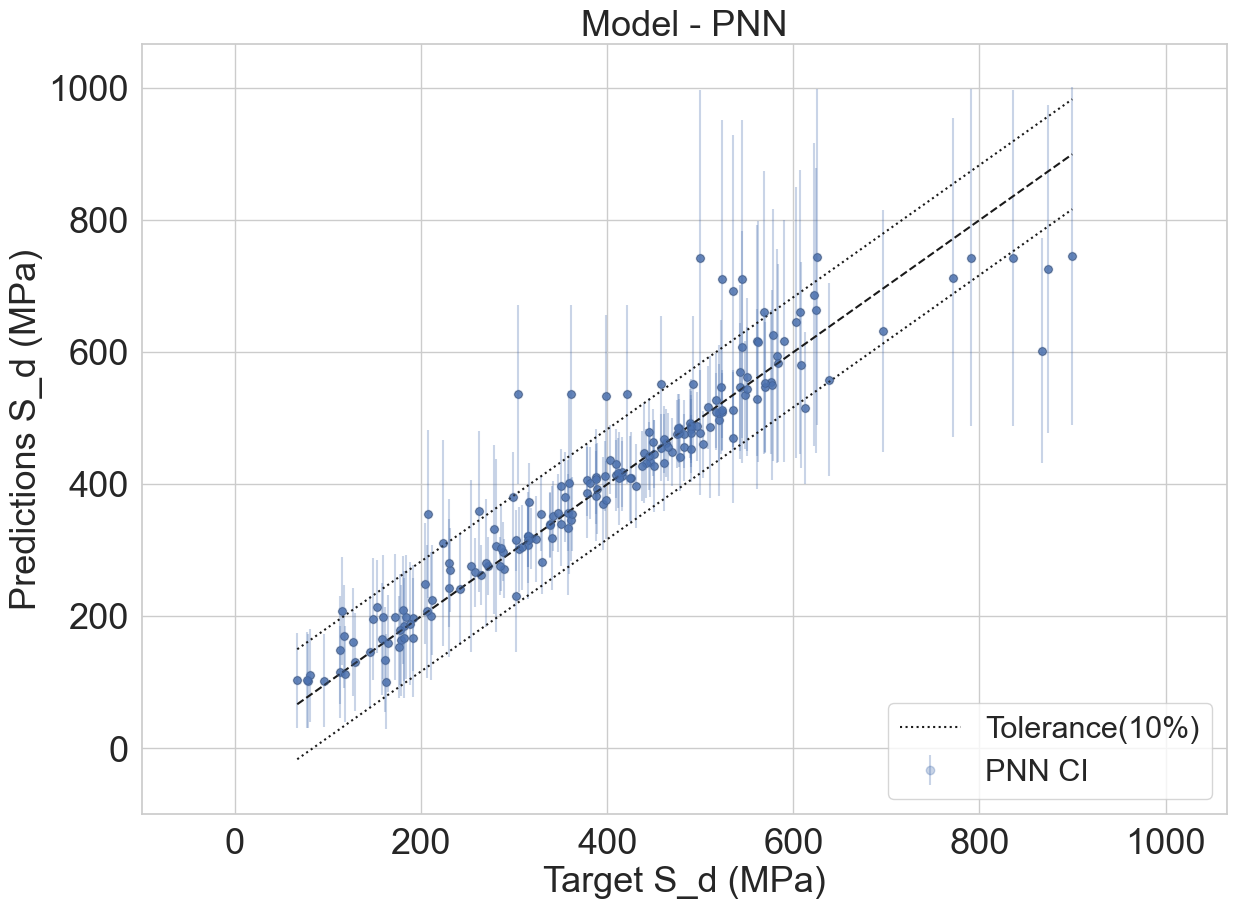

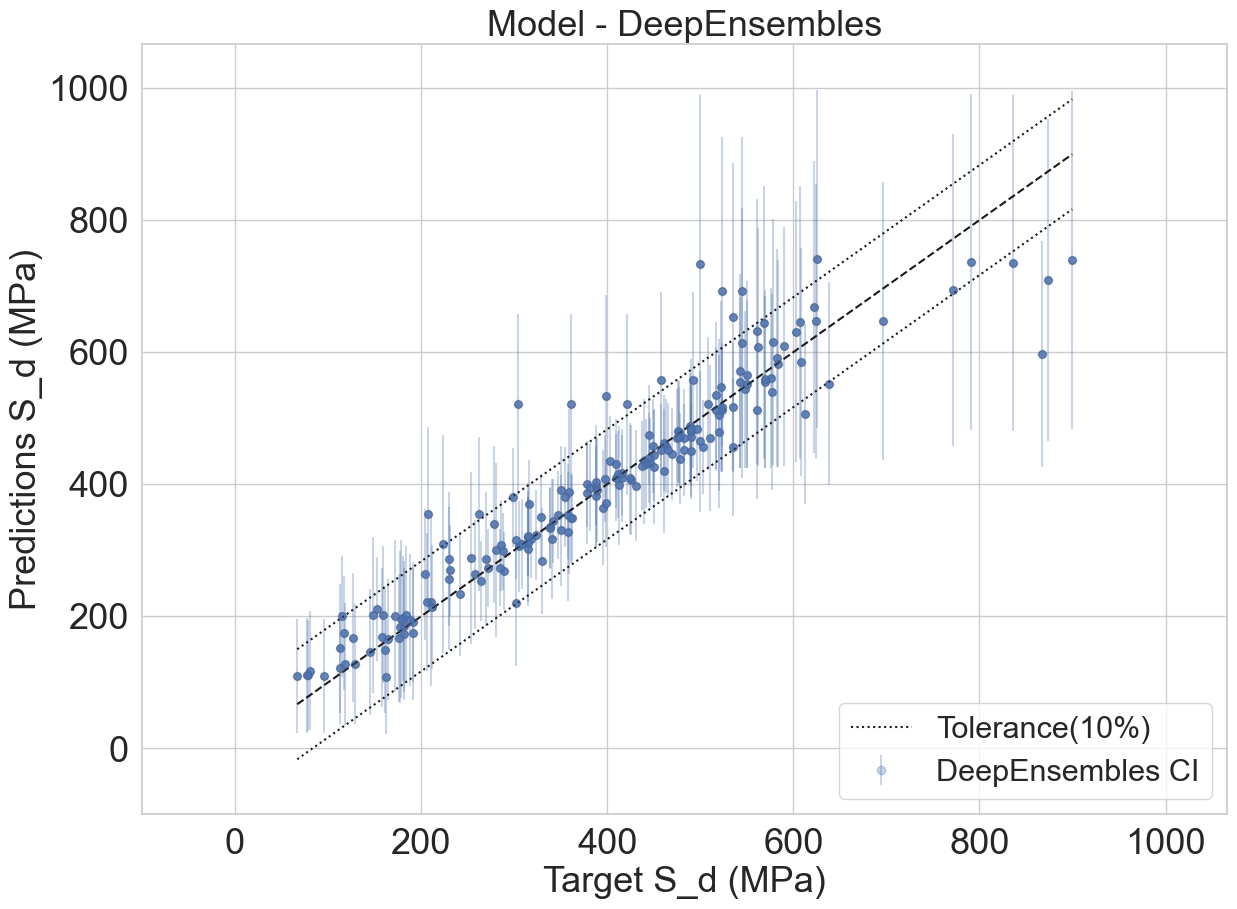

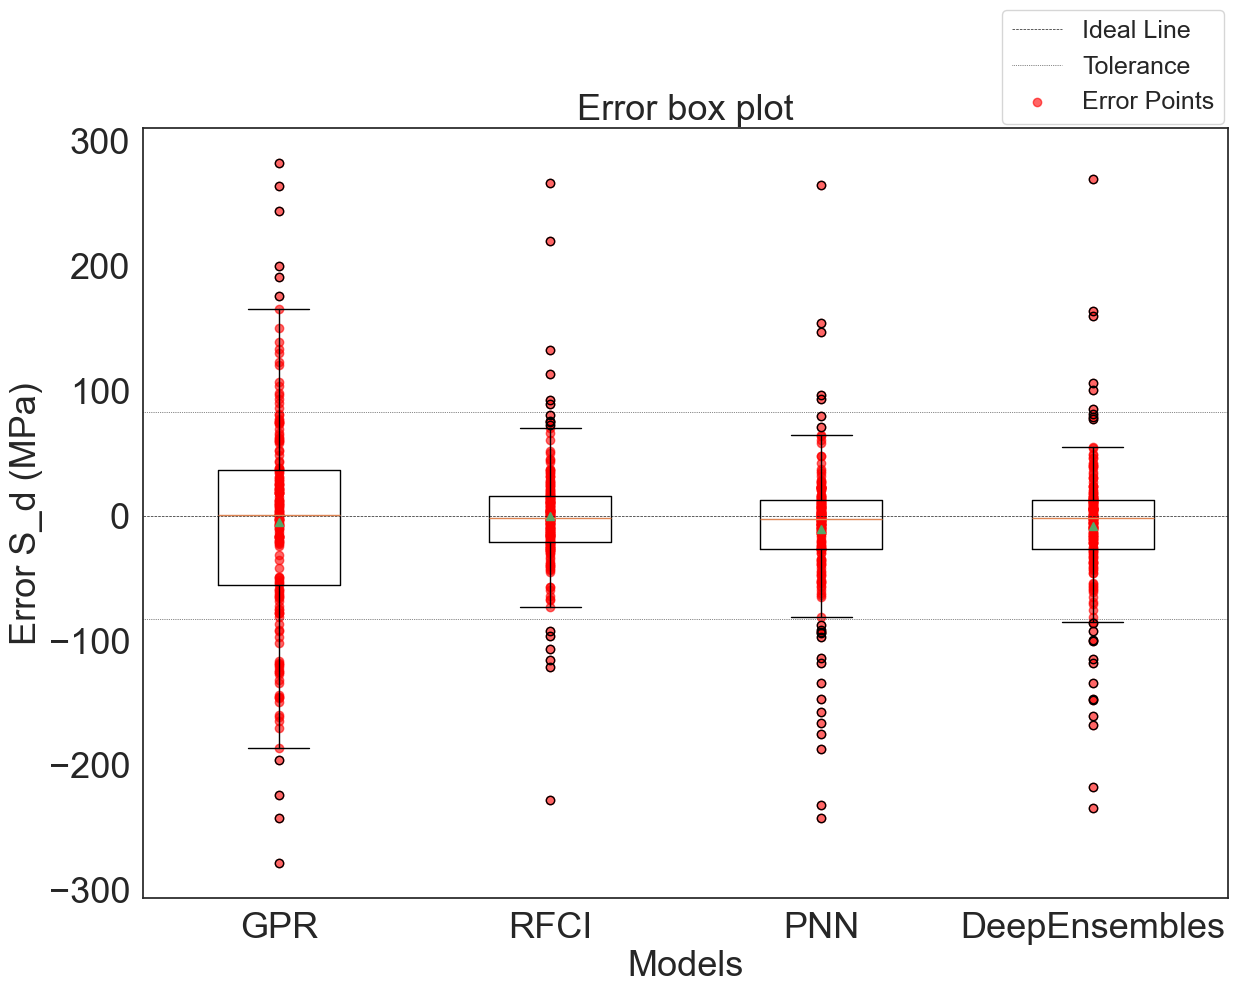

<Figure size 1400x1000 with 0 Axes>

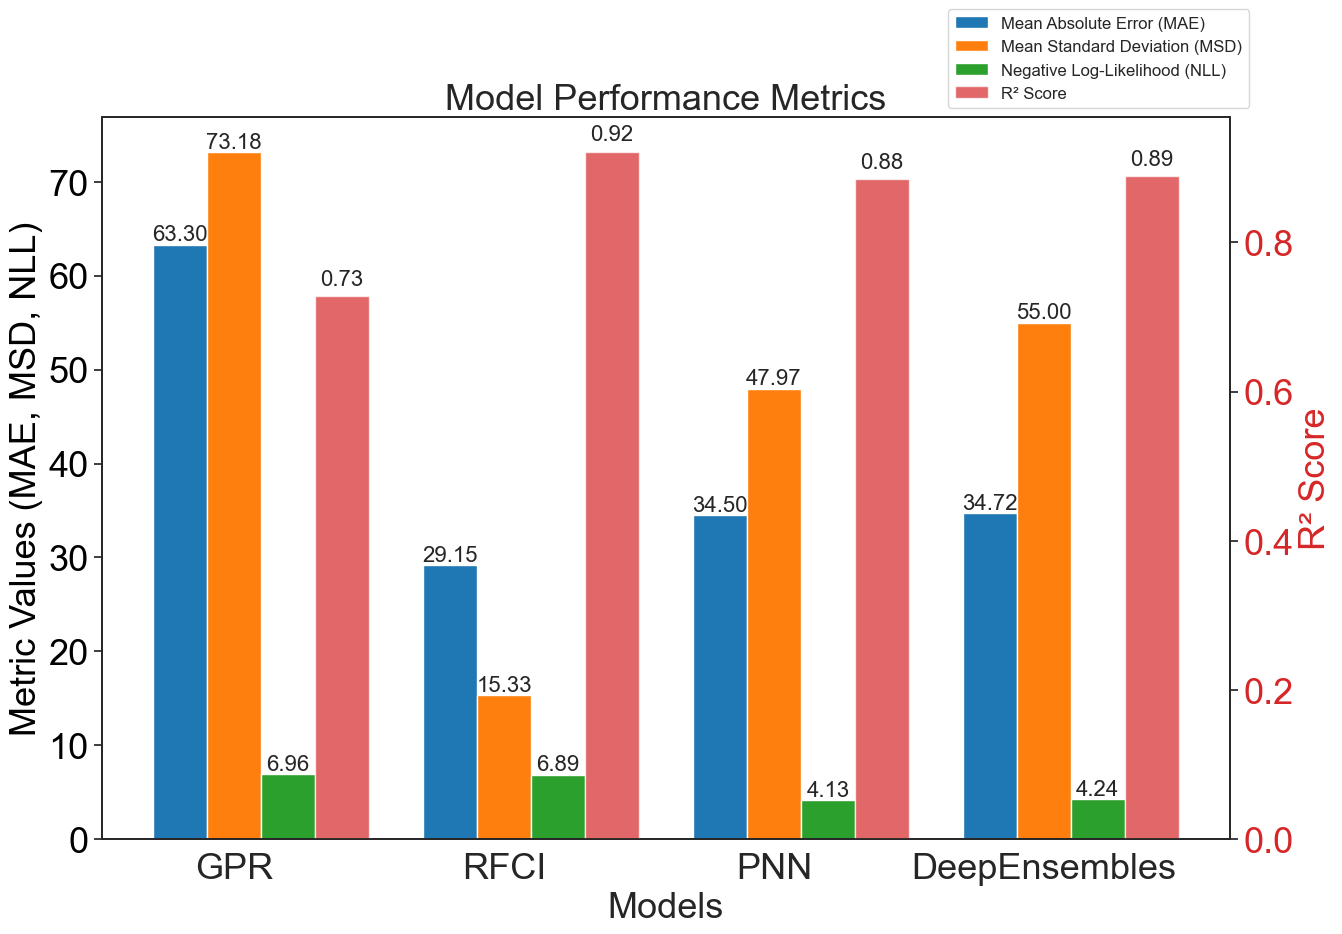

In [7]:
models, best_params_det, best_params_prob, df_steel = pipeline.fit_transform(data_steel)

Aluminum

In [4]:
data_jsms_alu = pd.read_excel(r"data\05_Final Data\JSMS Data Aluminium.xlsx")
data_dabef_alu = pd.read_excel(r"data\05_Final Data\DaBef Data Aluminium.xlsx")

columns = ['CodeSeries', 'Material', 'Rm', 'Kt', 'G0', 'R_ratio', 'L_Type', 'Stress_Type', 'Control', 'FT_Env_T', 'FT_Env_M', 's_d', 'SD_FKM_local','SD_FKM_nominal']   

data_jsms_alu = data_jsms_alu[columns]
data_dabef_alu = data_dabef_alu[columns]

data_aluminum = pd.concat((data_jsms_alu, data_dabef_alu), axis=0, ignore_index=True)
condition_outlierdetection = True

In [10]:
nn_model_steel = models.nn.neuralnet.model
pnn_model_steel = models.probabilistic_nn.neuralnet.model

In [11]:
nn_model_steel

ANN_Arch(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Sigmoid()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Sigmoid()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=128, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
  (softplus): Softplus(beta=1.0, threshold=20.0)
)

In [35]:
datasplit_seed = 20
custom_datasplit = True
method = {'Kfold': 5}

In [36]:
pipeline_transferlearning = Pipeline([
    ('DataCleaning',DataCleaning(columns_remove_missingvalues, columns_filter, exclude_norunnouts, feature_name, condition_outlierdetection, columns_outlier, detection_method_factor, handling_method)),
    ('DataTransformation',DataTransformation(columns_features, column_target, columns_impute, columns_categorical_dataencoding, dataencoding_method, con_scale, scale_method)),
    ('Visualization', Visualization(columns_visualization, columns_pairplots, metal_name="Aluminium")),
    ('Data_split', Data_split(columns_features, column_target, train_splitsize, test_splitsize, datasplit_seed, batch_size, custom_datasplit, method, columns_pairplots, columns_contourplots)),
    ('Model training', ML_Models_Train_transferlearning(nn_model_steel, method, '$S_d$ (MPa)', custom_datasplit, model_seed, con_hypopt=False, con_deter_models=True, con_prob_models=False, con_descale=True))  
])

Data cleaning step completed
Data transformation step completed


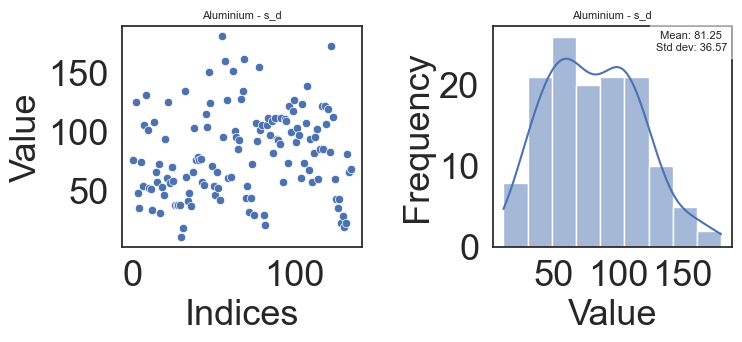

Data visualisation step completed
Number of folds: 5
Train data: 78
Val data: 26
Test data: 26

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


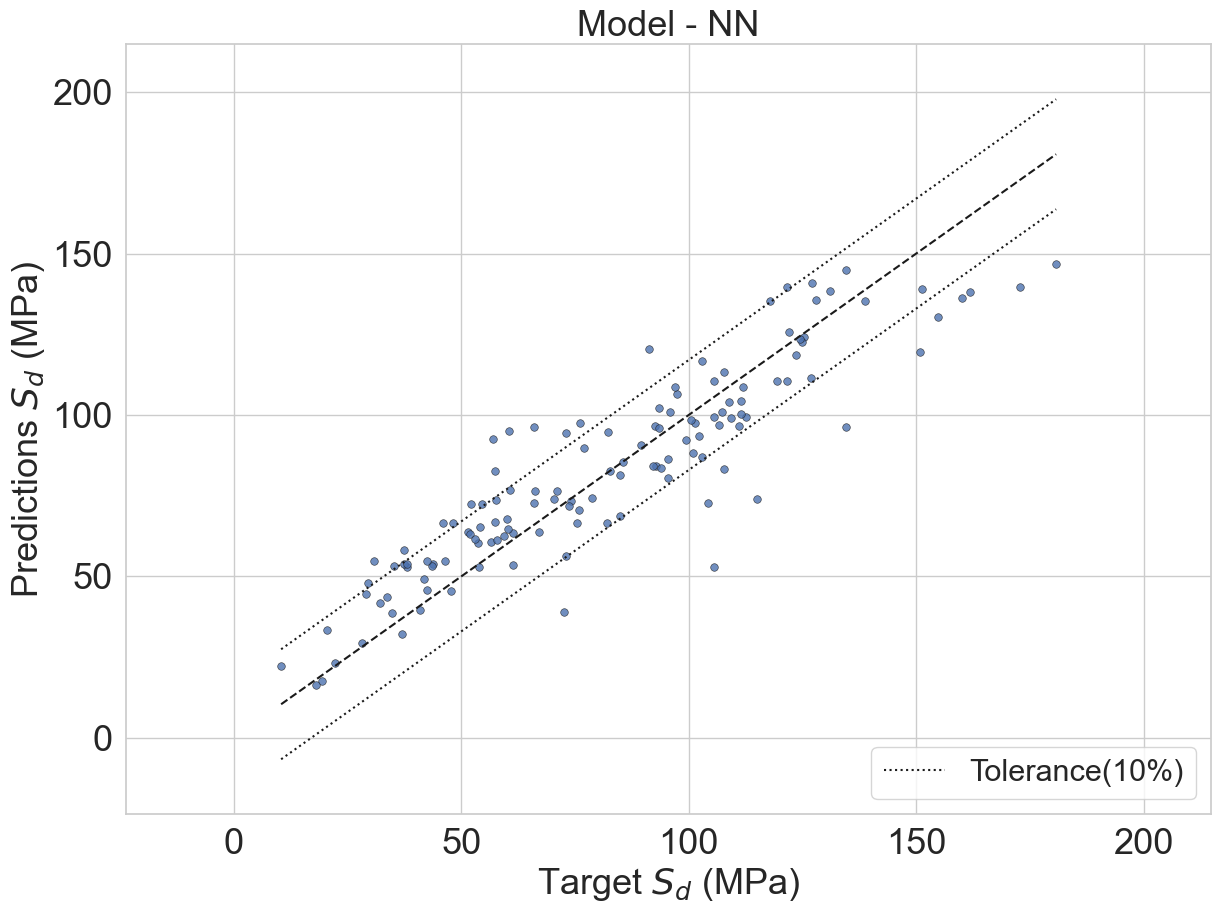

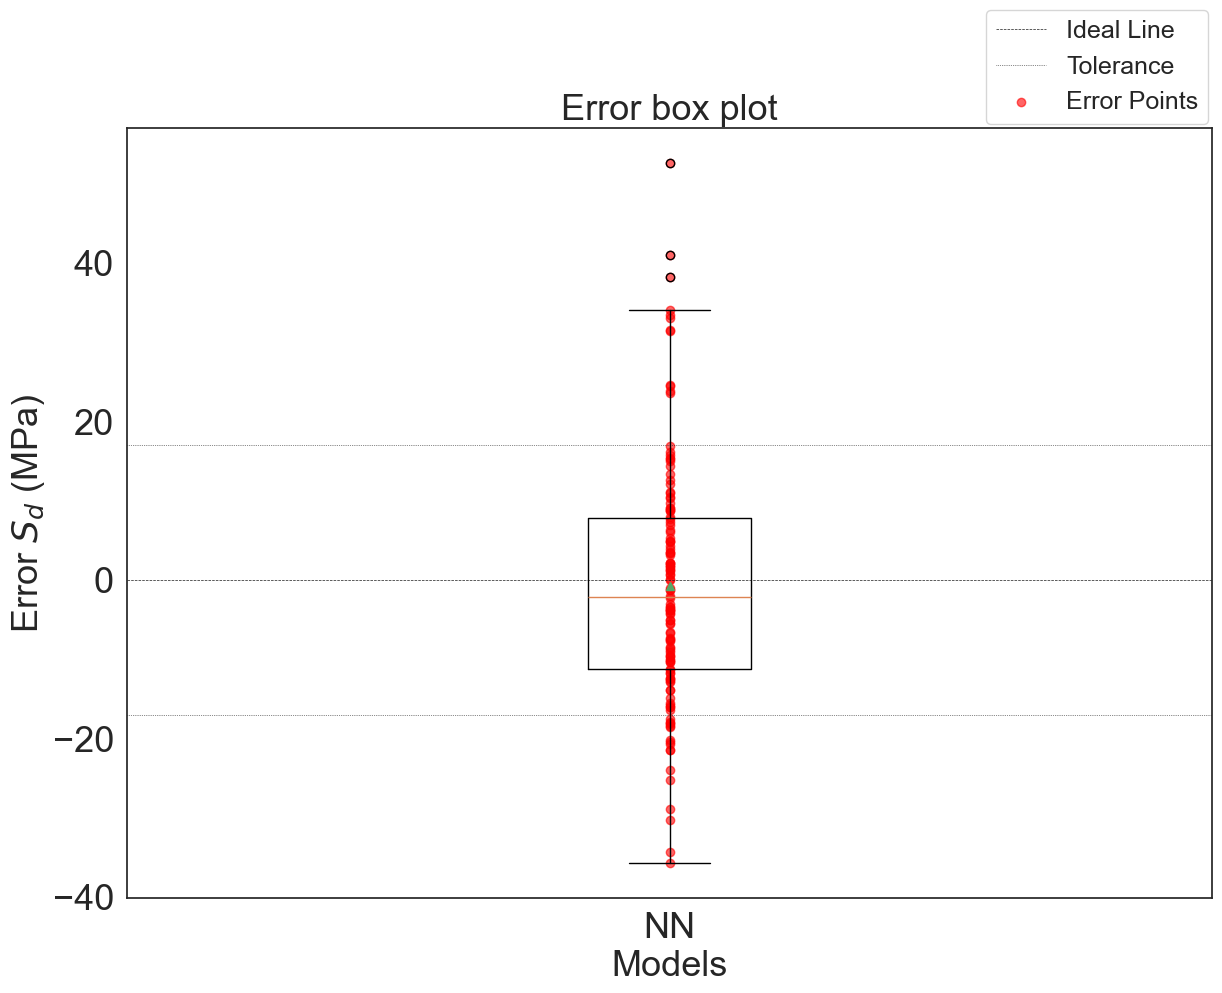

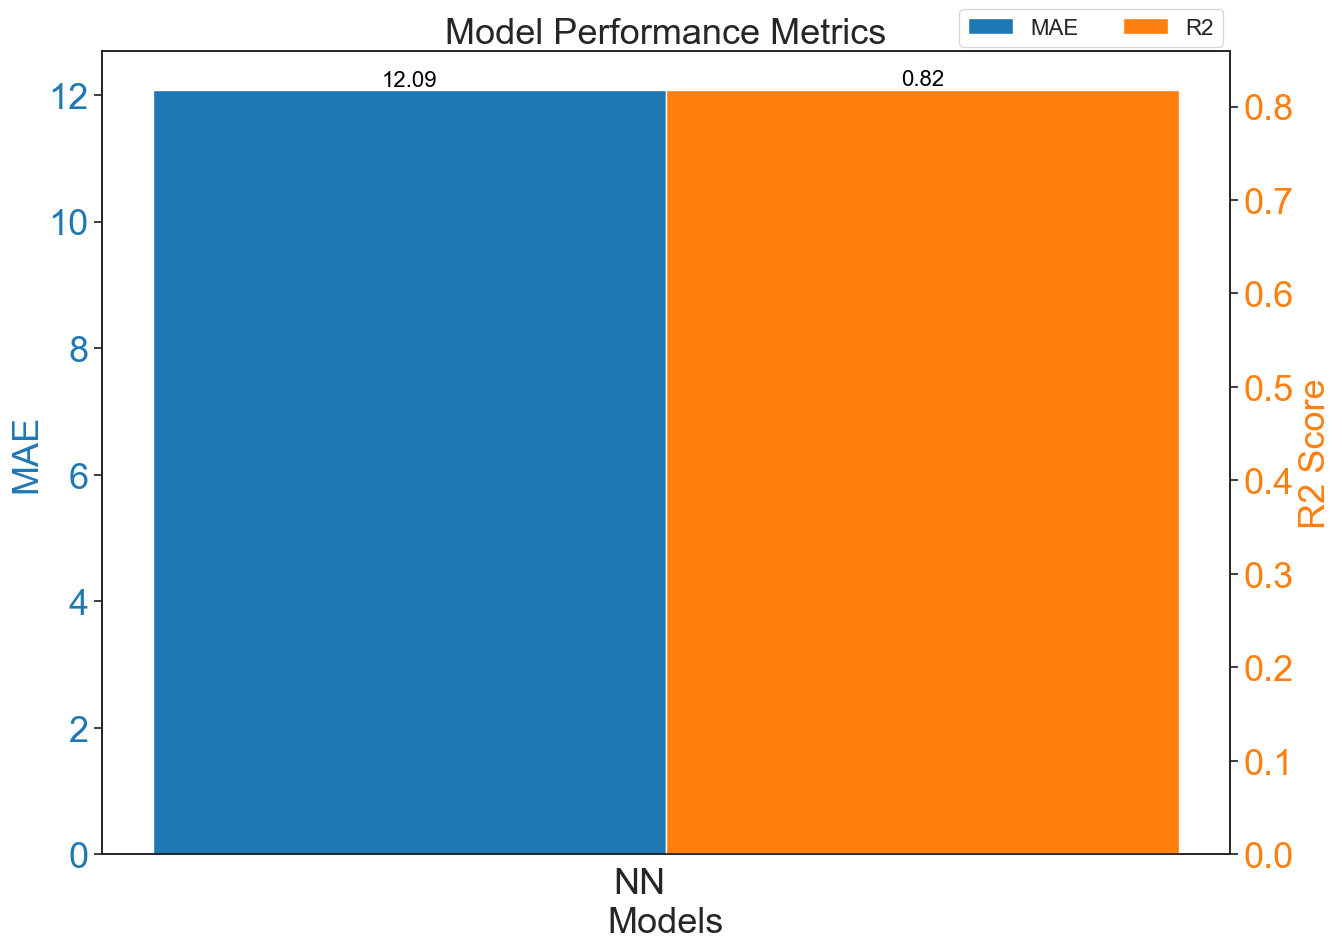

In [37]:
df_aluminum = pipeline_transferlearning.fit_transform(data_aluminum)